In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def sliceEmptyTimepoints(S, I, R, T, last_idx):
    return S[:last_idx+1], I[:last_idx+1], R[:last_idx+1], T[:last_idx+1]

In [25]:
def SIR(S0,I0,R0, beta, gamma, mu_birth, mu_death, t_max, stepsize):
    T = np.arange(0,t_max+stepsize,stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    N = np.zeros(len(T))
    
    for idx,t in enumerate(T):
        if idx==0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
            N[idx] = S0+I0+R0
        else:
            dS_dt = -beta * S[idx-1] * I[idx-1] / N[idx-1] + mu_birth * N[idx-1] - mu_death * S[idx-1]
            dI_dt = beta * S[idx-1] * I[idx-1] / N[idx-1] - gamma * I[idx-1] - mu_death * I[idx-1]
            dR_dt = gamma * I[idx-1] - mu_death * R[idx-1]
            
            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize
            R[idx] = R[idx-1] + dR_dt * stepsize
            N[idx] = S[idx] + I[idx] + R[idx]

            if N[idx] > 1500: 
                last_idx = idx
                break

            
    
    return sliceEmptyTimepoints(S, I, R, T, last_idx)

(0.0, 84.57750000000001)

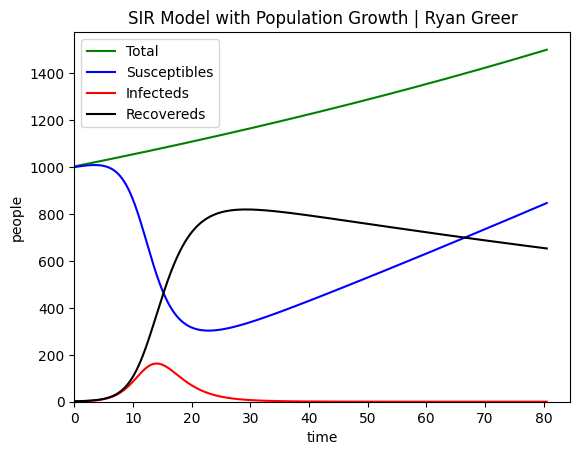

In [26]:
# SIR(S0,I0,R0, beta, gamma, t_max, stepsize):
beta = 1
gamma = 0.5
mu_birth = 0.01
mu_death = mu_birth / 2
R0 = beta / (gamma + mu_death)
S,I,R,T = SIR(S0=1000, I0=1, R0=R0, beta=beta, gamma=gamma, mu_birth=mu_birth, mu_death=mu_death, t_max=100, stepsize=0.05)
fig, ax = plt.subplots()
ax.plot(T,S+I+R, color='g', label='Total')
ax.plot(T,S, color='b', label='Susceptibles')
ax.plot(T,I, color='r', label='Infecteds')
ax.plot(T,R, color='k', label='Recovereds')
ax.set_title('SIR Model with Population Growth | Ryan Greer')
ax.set_xlabel('time')
ax.set_ylabel('people')
ax.legend()
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)